In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## DATA IMPORT

In [3]:
city_hour=pd.read_csv("city_hour.csv")

#### OUTPUT

In [4]:
city_hour.head(3)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
city_hour.shape

(707875, 16)

In [6]:
station_hour=pd.read_csv("station_hour.csv")


#### OUTPUT

In [7]:
station_hour.head(3)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.5,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.5,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.0,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN


In [8]:
station_hour.shape

(2589083, 16)

In [9]:
station=pd.read_csv("stations.csv")


#### OUTPUT

In [10]:
station.head(3)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN


In [11]:
station.shape

(230, 5)

# MERGE DATABASE TO GET FINAL DATASET

###### Merging "station_hour" with "stations"  dataset to get City, StationName, State, Status and all elements with AQI value, we choose this datasets because of large availabilty of data than city_hour dataset.

In [12]:
aqi = station_hour.merge(station, on='StationId', how='left')

#### OUTPUT

In [13]:
aqi.head(3)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24 17:00:00,60.5,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-24 18:00:00,65.5,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-24 19:00:00,80.0,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [14]:
aqi.shape

(2589083, 20)

# ADD NEW COLUMN WEEKDAY AND HOUR AND SEASONS

In [15]:
# Convert Datetime column to datetime format
aqi['Datetime'] = pd.to_datetime(aqi['Datetime'], errors='coerce')

# Now extract weekday and hour
aqi['Weekday'] = aqi['Datetime'].dt.day_name()
aqi['Hour'] = aqi['Datetime'].dt.hour# Convert Datetime column to datetime format (if not already done)
aqi['Datetime'] = pd.to_datetime(aqi['Datetime'], errors='coerce')

# Extract time-related features
aqi['Weekday'] = aqi['Datetime'].dt.day_name()   # e.g., Monday, Tuesday
aqi['Hour'] = aqi['Datetime'].dt.hour            # 0 to 23
aqi['Month'] = aqi['Datetime'].dt.month          # 1 to 12
aqi['Day'] = aqi['Datetime'].dt.day              # 1 to 31

# Function to assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply season function
aqi['Season'] = aqi['Month'].apply(get_season)

In [16]:
aqi.head(3)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,StationName,City,State,Status,Weekday,Hour,Month,Day,Season
0,AP001,2017-11-24 17:00:00,60.5,98.00,2.35,30.80,18.25,8.50,0.1,11.85,...,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Friday,17,11,24,Autumn
1,AP001,2017-11-24 18:00:00,65.5,111.25,2.70,24.20,15.07,9.77,0.1,13.17,...,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Friday,18,11,24,Autumn
2,AP001,2017-11-24 19:00:00,80.0,132.00,2.10,25.18,15.15,12.02,0.1,12.08,...,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Friday,19,11,24,Autumn


In [17]:
aqi.shape

(2589083, 25)

In [18]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 25 columns):
 #   Column       Dtype         
---  ------       -----         
 0   StationId    object        
 1   Datetime     datetime64[ns]
 2   PM2.5        float64       
 3   PM10         float64       
 4   NO           float64       
 5   NO2          float64       
 6   NOx          float64       
 7   NH3          float64       
 8   CO           float64       
 9   SO2          float64       
 10  O3           float64       
 11  Benzene      float64       
 12  Toluene      float64       
 13  Xylene       float64       
 14  AQI          float64       
 15  AQI_Bucket   object        
 16  StationName  object        
 17  City         object        
 18  State        object        
 19  Status       object        
 20  Weekday      object        
 21  Hour         int32         
 22  Month        int32         
 23  Day          int32         
 24  Season       object     

In [19]:
desc = aqi.describe().T  # Transpose for better readability

# Format the statistics for nicer display
formatted_desc = desc.copy()
formatted_desc['count'] = formatted_desc['count'].apply(lambda x: f"{int(x):,}")
for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
    formatted_desc[col] = formatted_desc[col].apply(lambda x: f"{x:.2f}")

# Print the formatted summary
print(formatted_desc)

              count    mean   min    25%     50%     75%      max     std
Datetime  2,589,083     .2f   .2f    .2f     .2f     .2f      .2f     nan
PM2.5     1,941,394   80.86  0.01  28.16   52.59   97.74  1000.00   89.48
PM10      1,469,831  158.48  0.01  64.00  116.25  204.00  1000.00  139.79
NO        2,035,372   22.79  0.01   3.05    7.15   18.58   500.00   48.46
NO2       2,060,110   35.24  0.01  13.10   24.79   45.48   499.99   34.98
NOx       2,098,275   40.55  0.00  11.35   22.86   45.70   500.00   55.91
NH3       1,352,465   28.71  0.01  11.23   22.35   37.78   499.97   27.53
CO        2,089,781    1.50  0.00   0.41    0.80    1.38   498.57    6.29
SO2       1,846,346   12.12  0.01   4.25    8.25   14.53   199.96   14.67
O3        1,863,110   38.06  0.01  11.02   24.75   49.53   997.00   47.11
Benzene   1,727,504    3.31  0.00   0.08    0.96    3.23   498.07   12.14
Toluene   1,546,717   14.90  0.00   0.34    3.40   15.10   499.99   33.30
Xylene      513,979    2.45  0.00   0.

In [20]:
aqi[['PM2.5', 'PM10', 'NO', 'NO2','NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene','AQI']].corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.832251,0.385238,0.374365,0.394172,0.376988,0.088612,0.184218,0.057122,0.126233,0.268597,0.080679,0.658323
PM10,0.832251,1.000000,0.420574,0.430605,0.444305,0.421061,0.184408,0.252194,0.002009,0.115628,0.311245,0.059570,0.756797
NO,0.385238,0.420574,1.000000,0.468193,0.870965,0.252987,0.174321,0.132570,-0.064601,0.157109,0.284012,0.082134,0.318944
NO2,0.374365,0.430605,0.468193,1.000000,0.648701,0.320924,0.161989,0.237950,0.060923,0.129973,0.283664,0.192418,0.401429
NOx,0.394172,0.444305,0.870965,0.648701,1.000000,0.281589,0.160336,0.176062,-0.028209,0.163525,0.281489,0.112453,0.364035
NH3,0.376988,0.421061,0.252987,0.320924,0.281589,1.000000,0.198629,0.116684,0.084150,0.051676,0.199166,0.030095,0.389390
CO,0.088612,0.184408,0.174321,0.161989,0.160336,0.198629,1.000000,0.223704,-0.025664,0.065954,0.114806,0.114397,0.409972
SO2,0.184218,0.252194,0.132570,0.237950,0.176062,0.116684,0.223704,1.000000,0.098339,0.054079,0.177732,0.156324,0.310280
O3,0.057122,0.002009,-0.064601,0.060923,-0.028209,0.084150,-0.025664,0.098339,1.000000,-0.026997,0.031673,-0.018990,0.132111
Benzene,0.126233,0.115628,0.157109,0.129973,0.163525,0.051676,0.065954,0.054079,-0.026997,1.000000,0.480473,0.221642,0.107283


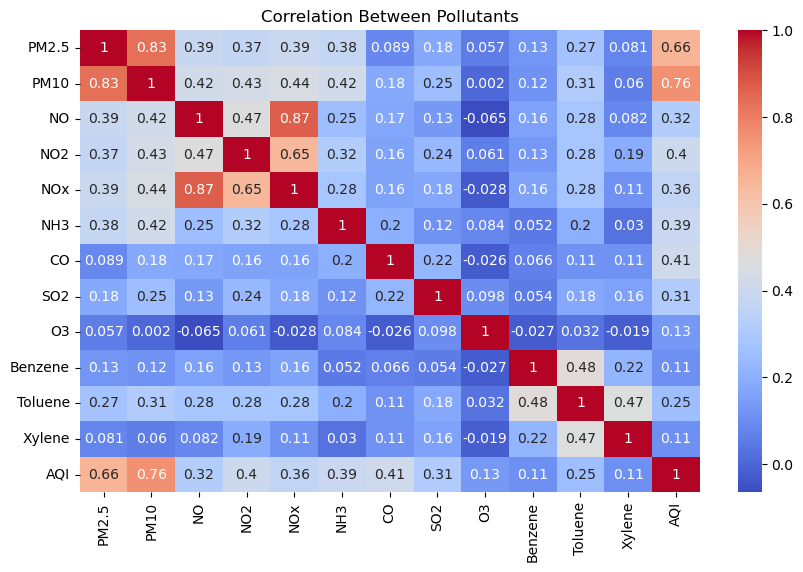

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(aqi[['PM2.5', 'PM10', 'NO', 'NO2','NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene','AQI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show() 

### FEATURE SELECTION BASED ON CORRELATION WITH AQI
##### PM2.5 shows the strongest correlation with AQI among all pollutants, indicating its significant contribution to overall air quality. In contrast, Xylene exhibits the weakest correlation with AQI, suggesting that finer particulates like PM2.5 play a more dominant role in determining AQI levels.
##### Based on this correlation analysis, we will retain pollutants that have a stronger influence on AQI: 'PM2.5', 'PM10', 'NH3', 'CO', 'NO2', and 'NO'. We will remove features that show weak correlation with AQI, specifically: 'Xylene', 'Benzene', 'Toluene', and 'O3'.

# REMOVING FEATURES  'Xylene', 'Benzene', 'Toluene', and 'O3'

In [22]:
aqi = aqi.drop(['O3', 'Benzene', 'Toluene', 'Xylene'], axis=1)

 # REMOVING NULL VALUE

In [23]:
#Checking null value for each column with percentage
missing_percentage = (aqi.isnull().sum() / len(aqi)) * 100
missing_percentage
missing_data = pd.DataFrame({
    'Missing Values Count':aqi.isnull().sum(),
    'Missing Values Percentage':round(missing_percentage,2)
})
print(missing_data) 

             Missing Values Count  Missing Values Percentage
StationId                       0                       0.00
Datetime                        0                       0.00
PM2.5                      647689                      25.02
PM10                      1119252                      43.23
NO                         553711                      21.39
NO2                        528973                      20.43
NOx                        490808                      18.96
NH3                       1236618                      47.76
CO                         499302                      19.28
SO2                        742737                      28.69
AQI                        570190                      22.02
AQI_Bucket                 570190                      22.02
StationName                     0                       0.00
City                            0                       0.00
State                           0                       0.00
Status                  

In [24]:
# removing all null value rows from AQI column
aqi=aqi[~aqi["AQI"].isnull()]
aqi.isnull().sum()

StationId           0
Datetime            0
PM2.5          138787
PM10           597086
NO             124498
NO2             99059
NOx            157440
NH3            734261
CO             170834
SO2            294848
AQI                 0
AQI_Bucket          0
StationName         0
City                0
State               0
Status           7073
Weekday             0
Hour                0
Month               0
Day                 0
Season              0
dtype: int64

In [25]:
aqi = aqi.dropna()

In [26]:
#Checking null value for each column with percentage after cleaning null values
missing_percentage = (aqi.isnull().sum() / len(aqi)) * 100
missing_percentage
missing_data = pd.DataFrame({
    'Missing Values Count':aqi.isnull().sum(),
    'Missing Values Percentage':round(missing_percentage,2)
})
print(missing_data)

             Missing Values Count  Missing Values Percentage
StationId                       0                        0.0
Datetime                        0                        0.0
PM2.5                           0                        0.0
PM10                            0                        0.0
NO                              0                        0.0
NO2                             0                        0.0
NOx                             0                        0.0
NH3                             0                        0.0
CO                              0                        0.0
SO2                             0                        0.0
AQI                             0                        0.0
AQI_Bucket                      0                        0.0
StationName                     0                        0.0
City                            0                        0.0
State                           0                        0.0
Status                  

#### OUTPUT

In [27]:
aqi.head(3)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,StationName,City,State,Status,Weekday,Hour,Month,Day,Season
16,AP001,2017-11-25 09:00:00,104.00,148.5,1.93,23.00,13.75,9.80,0.1,15.3,...,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Saturday,9,11,25,Autumn
17,AP001,2017-11-25 10:00:00,94.50,142.0,1.33,16.25,9.75,9.65,0.1,17.0,...,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Saturday,10,11,25,Autumn
18,AP001,2017-11-25 11:00:00,82.75,126.5,1.47,14.83,9.07,9.70,0.1,15.4,...,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,Saturday,11,11,25,Autumn


In [28]:
aqi.shape

(973180, 21)

# REMOVING DUPLICATE ROWS

In [29]:
#checking duplicate values
print("Duplicate rows:", aqi.duplicated().sum())
cd = aqi.drop_duplicates()

Duplicate rows: 0


# REMOVING OUTLIERS

## Using IQR (Interquartile Range) method for outlier detection and elimination.

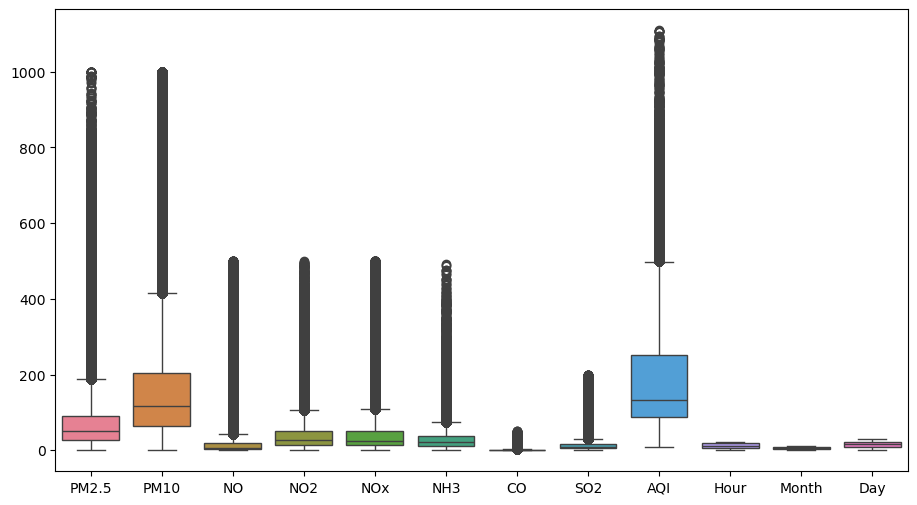

In [30]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=aqi)
plt.show()

In [31]:
#Handling outliers for each columns except AQI

In [32]:

Q1 = aqi['PM2.5'].quantile(0.10)  # 10th percentile
Q3 = aqi['PM2.5'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['PM2.5'] >= Q1 - 1.5 * IQR) & (aqi['PM2.5'] <= Q3 + 1.5 * IQR)]

# outlier treatment for PM10:

Q1 = aqi['PM10'].quantile(0.10)  # 10th percentile
Q3 = aqi['PM10'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['PM10'] >= Q1 - 1.5 * IQR) & (aqi['PM10'] <= Q3 + 1.5 * IQR)]


# outlier treatment for NO:

Q1 = aqi['NO'].quantile(0.10)  # 10th percentile
Q3 = aqi['NO'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['NO'] >= Q1 - 1.5 * IQR) & (aqi['NO'] <= Q3 + 1.5 * IQR)]

# outlier treatment for NO2:

Q1 = aqi['NO2'].quantile(0.10)  # 10th percentile
Q3 = aqi['NO2'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['NO2'] >= Q1 - 1.5 * IQR) & (aqi['NO2'] <= Q3 + 1.5 * IQR)]

# outlier treatment for NOx:

Q1 = aqi['NOx'].quantile(0.10)  # 10th percentile
Q3 = aqi['NOx'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['NOx'] >= Q1 - 1.5 * IQR) & (aqi['NOx'] <= Q3 + 1.5 * IQR)]

# outlier treatment for PH3:

Q1 = aqi['NH3'].quantile(0.10)  # 10th percentile
Q3 = aqi['NH3'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['NH3'] >= Q1 - 1.5 * IQR) & (aqi['NH3'] <= Q3 + 1.5 * IQR)]

# outlier treatment for CO:

Q1 = aqi['CO'].quantile(0.10)  # 10th percentile
Q3 = aqi['CO'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['CO'] >= Q1 - 1.5 * IQR) & (aqi['CO'] <= Q3 + 1.5 * IQR)]

# outlier treatment for SO2:

Q1 = aqi['SO2'].quantile(0.10)  # 10th percentile
Q3 = aqi['SO2'].quantile(0.90)  # 90th percentile
IQR = Q3 - Q1
aqi= aqi[(aqi['SO2'] >= Q1 - 1.5 * IQR) & (aqi['SO2'] <= Q3 + 1.5 * IQR)]


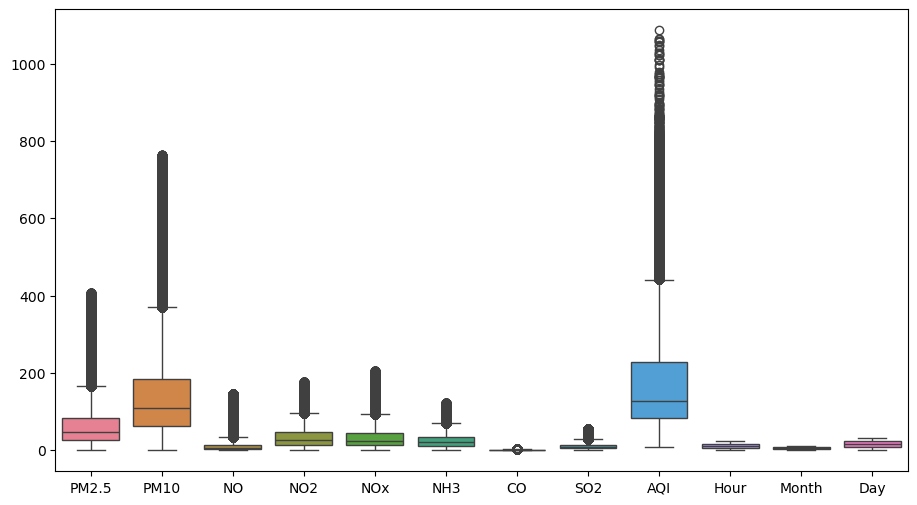

In [33]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=aqi)
plt.show()

In [34]:
aqi.shape

(902461, 21)

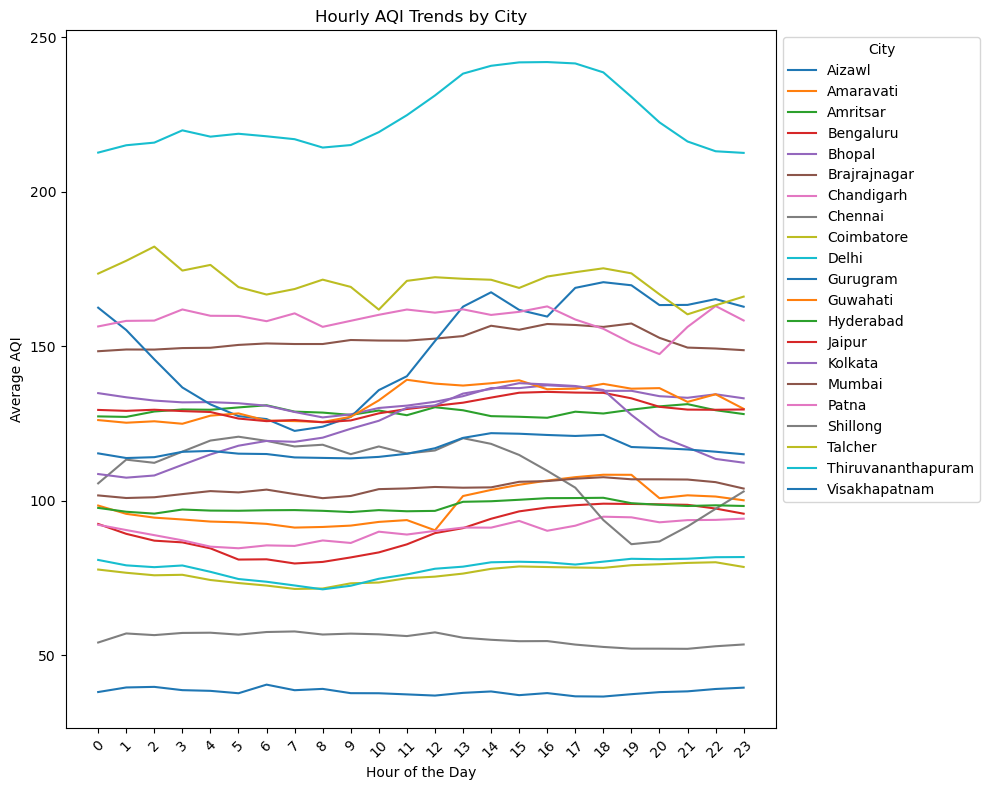

In [35]:
# Group by 'Hour' and 'City' to calculate the mean AQI
hourly_aqi = aqi.groupby(['Hour', 'City'])['AQI'].mean().unstack()

# Plot the hourly AQI trends by city
hourly_aqi.plot(figsize=(10, 8), kind='line', title='Hourly AQI Trends by City')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.xticks(range(24), rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

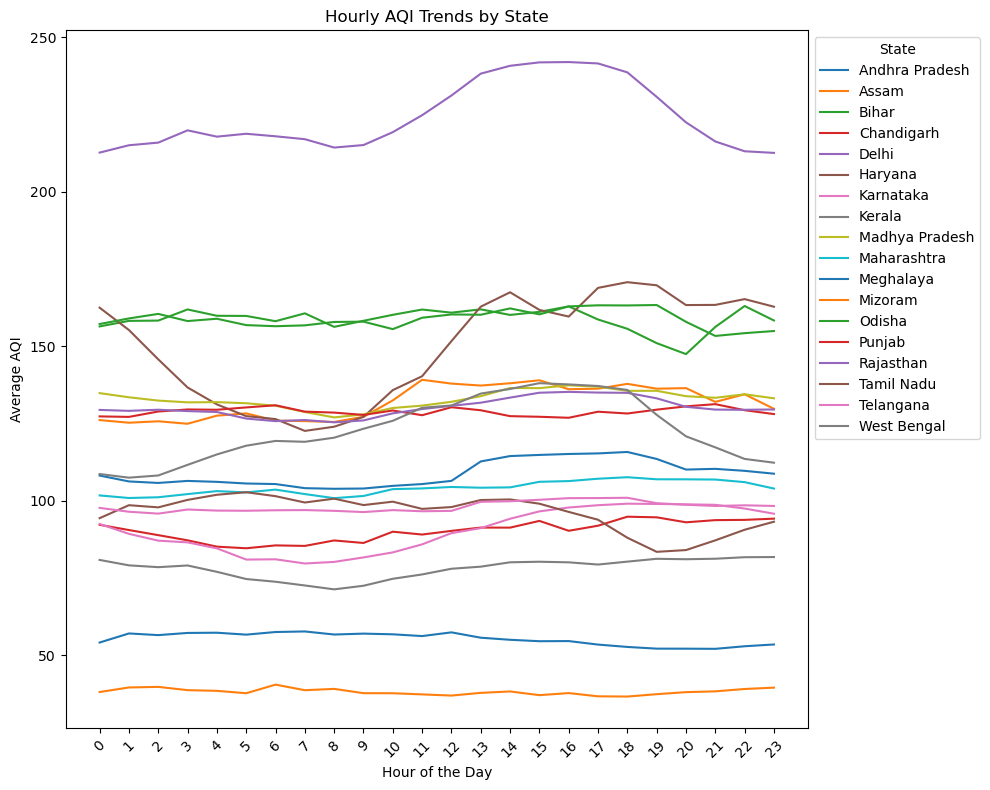

In [36]:
# Group by 'Hour' and 'City' to calculate the mean AQI
hourly_aqi = aqi.groupby(['Hour', 'State'])['AQI'].mean().unstack()

# Plot the hourly AQI trends by city
hourly_aqi.plot(figsize=(10, 8), kind='line', title='Hourly AQI Trends by State')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.xticks(range(24), rotation=45)
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

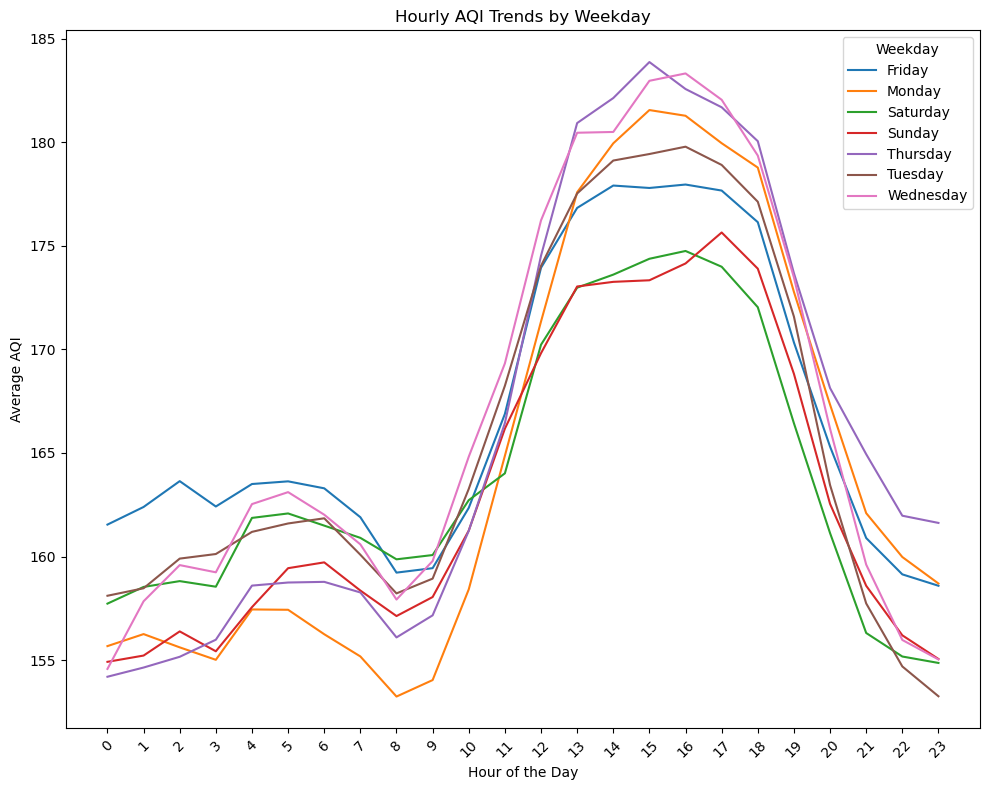

In [37]:
# Group by 'Hour' and 'City' to calculate the mean AQI
hourly_aqi = aqi.groupby(['Hour', 'Weekday'])['AQI'].mean().unstack()

# Plot the hourly AQI trends by city
hourly_aqi.plot(figsize=(10, 8), kind='line', title='Hourly AQI Trends by Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.xticks(range(24), rotation=45)
plt.legend(title='Weekday', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

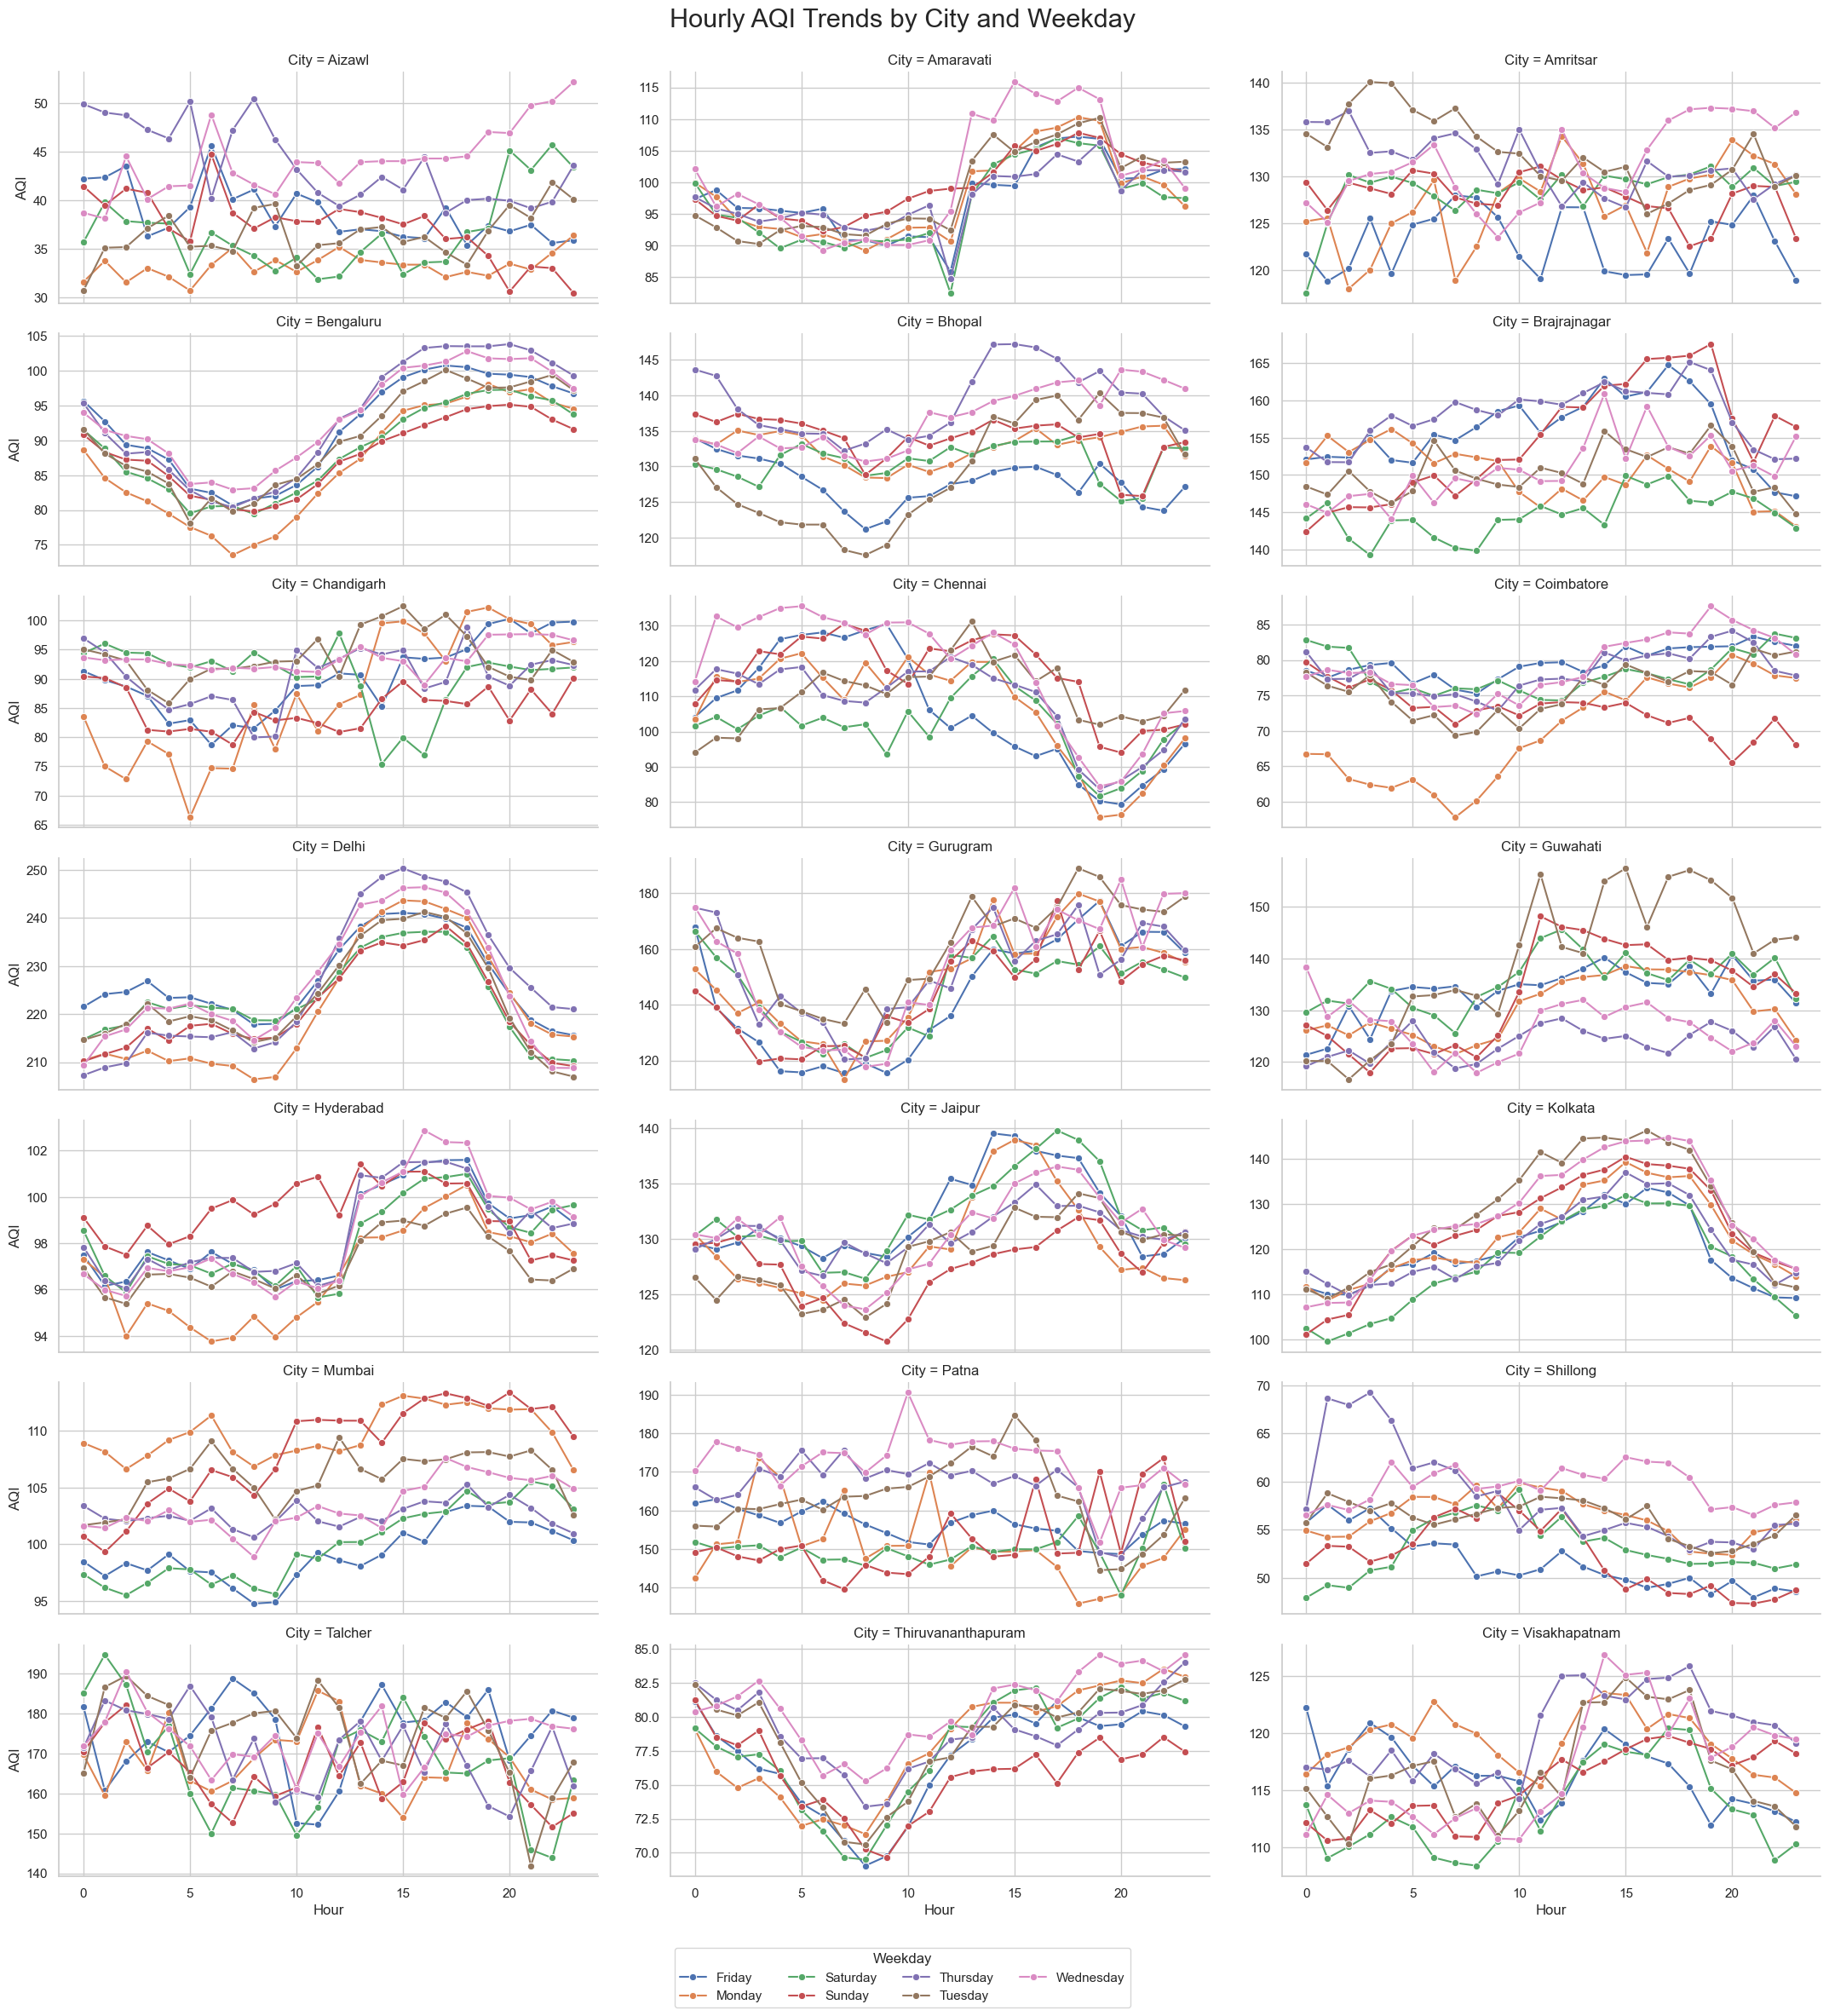

In [38]:
# Group by 'City', 'Weekday', and 'Hour', and calculate mean AQI
grouped = aqi.groupby(['City', 'Weekday', 'Hour'])['AQI'].mean().reset_index()

# Set the plotting style
sns.set(style="whitegrid")

# Create a FacetGrid: one plot per city, AQI by hour, hue for weekday
g = sns.FacetGrid(grouped, col="City", col_wrap=3, height=4, aspect=1.5, sharey=False)

# Plot the data
g.map_dataframe(sns.lineplot, x='Hour', y='AQI', hue='Weekday', marker='o')

# Get legend handles and labels from one axis
handles, labels = g.axes[0].get_legend_handles_labels()

# Remove legends from individual plots
for ax in g.axes.flatten():
    if ax.legend_:
        ax.legend_.remove()

# Add a single, centered legend at the bottom
g.fig.legend(handles, labels, title='Weekday', loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

# Set the overall figure size
g.fig.set_size_inches(22, 22)

# Add a title to the whole figure
g.fig.suptitle('Hourly AQI Trends by City and Weekday', fontsize=22, y=1.02)

# Adjust layout to fit everything
plt.tight_layout(rect=[1, 0.05, 1, 0.95])  # Leave space for title and legend
plt.show()

### One-Hot Encode the 'Weekday' Column

In [39]:
# One-Hot Encoding for 'Weekday'
weekday_dummies = pd.get_dummies(aqi['Weekday'], prefix='Weekday')

# Concatenate the dummies with the original DataFrame
aqi = pd.concat([aqi, weekday_dummies], axis=1)

# Drop the original 'Weekday' column if you no longer need it
aqi.drop('Weekday', axis=1, inplace=True)

# Preview updated dataset
aqi.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Month,Day,Season,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
16,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,...,11,25,Autumn,False,False,True,False,False,False,False
17,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,...,11,25,Autumn,False,False,True,False,False,False,False
18,AP001,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,...,11,25,Autumn,False,False,True,False,False,False,False
21,AP001,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,...,11,25,Autumn,False,False,True,False,False,False,False
22,AP001,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,...,11,25,Autumn,False,False,True,False,False,False,False


In [40]:
# One-Hot Encode the 'Season' Column

In [41]:
# One-Hot Encode the 'Season' column
season_dummies = pd.get_dummies(aqi['Season'], prefix='Season')

# Concatenate with the main DataFrame
aqi = pd.concat([aqi, season_dummies], axis=1)

# Drop the original 'Season' column
aqi.drop('Season', axis=1, inplace=True)

### Label Encoding the 'Status' Column

This avoids any false ordering.

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
aqi['Status_Encoded'] = le.fit_transform(aqi['Status'])

# Optional: drop original column
aqi.drop('Status', axis=1, inplace=True)

In [43]:
aqi.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Status_Encoded
16,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,...,True,False,False,False,False,True,False,False,False,0
17,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,...,True,False,False,False,False,True,False,False,False,0
18,AP001,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,...,True,False,False,False,False,True,False,False,False,0
21,AP001,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,...,True,False,False,False,False,True,False,False,False,0
22,AP001,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,...,True,False,False,False,False,True,False,False,False,0


In [44]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902461 entries, 16 to 2589082
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   StationId          902461 non-null  object        
 1   Datetime           902461 non-null  datetime64[ns]
 2   PM2.5              902461 non-null  float64       
 3   PM10               902461 non-null  float64       
 4   NO                 902461 non-null  float64       
 5   NO2                902461 non-null  float64       
 6   NOx                902461 non-null  float64       
 7   NH3                902461 non-null  float64       
 8   CO                 902461 non-null  float64       
 9   SO2                902461 non-null  float64       
 10  AQI                902461 non-null  float64       
 11  AQI_Bucket         902461 non-null  object        
 12  StationName        902461 non-null  object        
 13  City               902461 non-null  object     

In [45]:
#aqi.to_csv("aqi_cleaned", index=False)

In [46]:
aqi1=aqi

# MODELS

### CNN LSTM MODEL

In [47]:
# Convert the 'Datetime' column to datetime format
aqi1['Datetime'] = pd.to_datetime(aqi1['Datetime'], errors='coerce')

In [48]:
# Drop unnecessary columns
columns_to_drop = ['StationId', 'Status_Encoded']
aqi1.drop(columns=columns_to_drop, inplace=True)

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Select features for modeling
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2']
X = aqi1[features]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
#Sequence Creation
import numpy as np

def create_sequences(data, target, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(data) - seq_length):
        X_seq.append(data[i:i+seq_length])
        y_seq.append(target[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [51]:
# Target Variable Selection
target = aqi1['AQI'].values

In [52]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

sequence_length = 24  # Using past 24 hours
X_seq, y_seq = create_sequences(X_scaled, target, sequence_length)

# Reshape input for CNN-LSTM
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], X_seq.shape[2]))

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.2))

In [53]:
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=5,              # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored metric
    verbose=1
)

In [55]:
# For regression
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 257s 23ms/step - loss: 13008.6250 - val_loss: 1249.4115
Epoch 2/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 269s 23ms/step - loss: 1341.5087 - val_loss: 1074.2021
Epoch 3/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 246s 22ms/step - loss: 1230.5179 - val_loss: 1023.3240
Epoch 4/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 269s 22ms/step - loss: 1163.3855 - val_loss: 1013.0030
Epoch 5/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 270s 23ms/step - loss: 1113.4419 - val_loss: 973.5273
Epoch 6/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 261s 23ms/step - loss: 1077.1708 - val_loss: 957.7378
Epoch 7/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 260s 23ms/step - loss: 1048.1072 - val_loss: 919.9901
Epoch 8/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 269s 23ms/step - loss: 1014.1821 - val_loss: 896.4428
Epoch 9/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 321s 23ms/step - loss: 990.0551 - val_loss: 864.1747
Epoch 10/10
11281/11281 ━━━━━━━━━━━━━━━━━━━━ 315s 23ms/step - loss: 973.0474 - val_loss: 859.1010
Restoring model 

In [56]:
# For regression
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
# For regression
predictions = model.predict(X_test)

5641/5641 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 869.0211
Test Loss: 859.1021728515625
5641/5641 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'y_test' contains the true AQI values
# and 'predictions' contains the predicted AQI values from your model

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared Score
r2 = r2_score(y_test, predictions)

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Absolute Error (MAE): 15.84
Mean Squared Error (MSE): 859.10
Root Mean Squared Error (RMSE): 29.31
R-squared (R² Score): 0.93


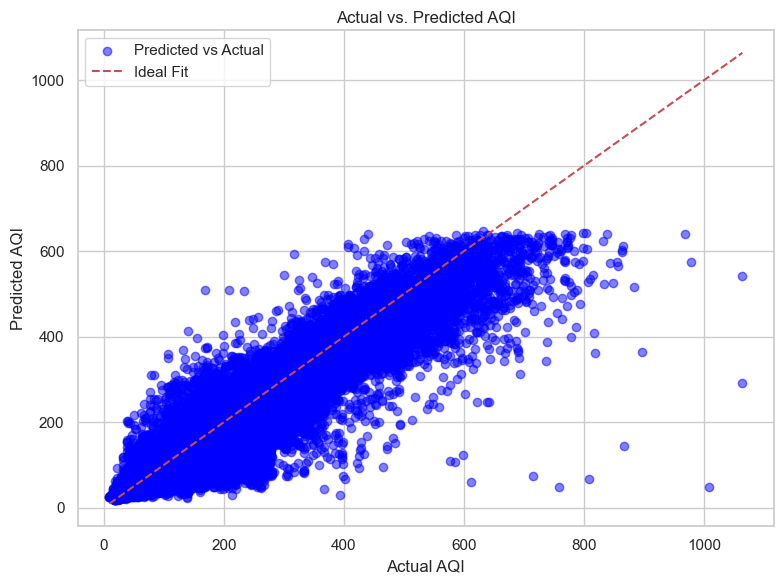

In [58]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual AQI values and predictions contains predicted AQI values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Create a DataFrame with actual and predicted AQI values
results_df = pd.DataFrame({
    'Actual AQI': y_test.flatten(),
    'Predicted AQI': predictions.flatten()
})

# Display the first few rows
print(results_df.head())

   Actual AQI  Predicted AQI
0       200.0     217.619064
1       482.0     503.454803
2        40.0      35.410137
3       288.0     273.468140
4       146.0     148.050385


### RANDOM FOREST REGRESSION

In [60]:
#aqi=pd.read_csv("aqi_cleaned")

In [61]:
aqi.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,AQI,...,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
16,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,155.0,...,False,True,False,False,False,False,True,False,False,False
17,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,159.0,...,False,True,False,False,False,False,True,False,False,False
18,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,173.0,...,False,True,False,False,False,False,True,False,False,False
21,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,191.0,...,False,True,False,False,False,False,True,False,False,False
22,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,191.0,...,False,True,False,False,False,False,True,False,False,False


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Drop non-numeric/unnecessary columns
#Creating aqi1 as new dataset to work on each model without altering cleaned dataset.
aqi1=aqi
X = aqi1.drop(columns=['Datetime', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State'])
y = aqi1['AQI']

In [64]:
# Optional: scale features (RF doesn't need it, but okay if already done)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import randint
import pandas as pd

# Simplified parameter grid for faster tuning
param_dist = {
    'n_estimators': randint(50, 100),         # fewer trees
    'max_depth': [10, 20, None],              # fewer depth options
    'min_samples_split': [2, 5],              # fewer splits
    'min_samples_leaf': [1, 2],               # fewer leaf sizes
    'max_features': ['sqrt']                  # fixed feature selector
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized Search with reduced load
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # only 20 combinations
    cv=2,                      # 2-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228A75375F0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [67]:
# Best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [68]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [69]:
print("Best Parameters:", random_search.best_params_)
print(f'Tuned Random Forest - MAE: {mae:.2f}, MSE: {mse:.2f}')

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 172}
Tuned Random Forest - MAE: 28.78, MSE: 1889.71


In [70]:
# Combine actual and predicted into a DataFrame
results_df = pd.DataFrame({
    'Actual_AQI': y_test.values,
    'Predicted_AQI': y_pred
})

print(results_df.head())  # Show first few rows

   Actual_AQI  Predicted_AQI
0       307.0     288.744186
1        93.0      82.476744
2       116.0     123.877907
3       135.0     141.593023
4       155.0     143.598837


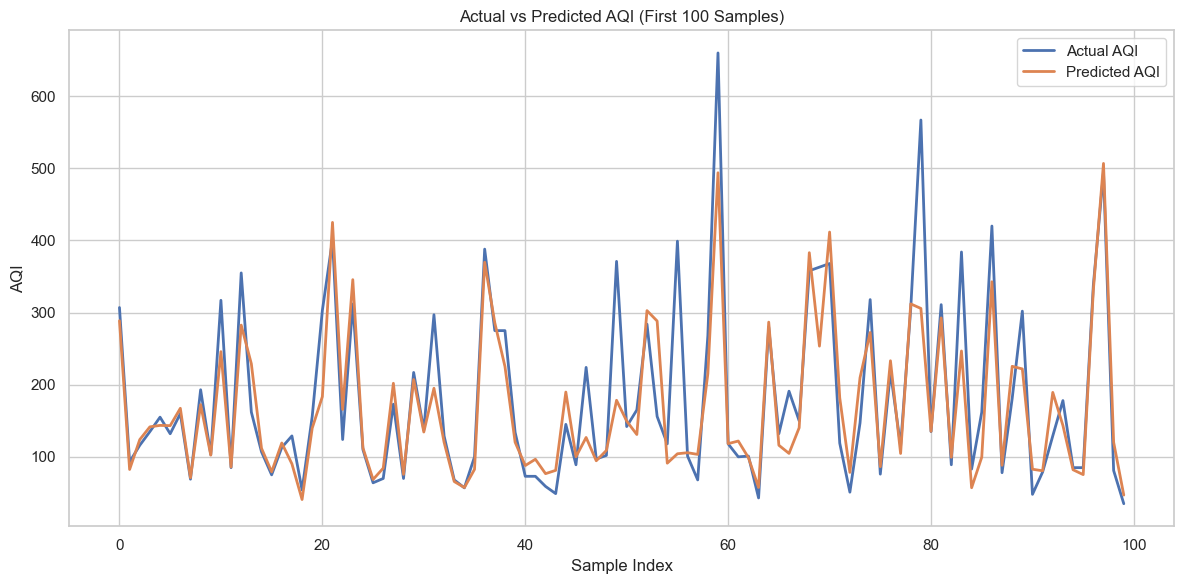

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual_AQI'].values[:100], label='Actual AQI', linewidth=2)
plt.plot(results_df['Predicted_AQI'].values[:100], label='Predicted AQI', linewidth=2)
plt.title('Actual vs Predicted AQI (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### RANDOM FOREST CLASSIFIER

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Encode AQI_Bucket (classification target)
label_encoder = LabelEncoder()
y_clf = label_encoder.fit_transform(aqi1['AQI_Bucket'])

# Drop non-feature columns to create X for classification
X_clf = aqi1.drop(columns=['Datetime', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State'])

In [73]:
# Scale features
scaler_clf = MinMaxScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf)

In [74]:
# Split data for classification model
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

In [75]:
# Hyperparameter grid
param_dist_clf = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Base classifier
rf_clf = RandomForestClassifier(random_state=42)

# Randomized search
random_search_clf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist_clf,
    n_iter=20,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search_clf.fit(X_train_clf, y_train_clf)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228A8B70230>},
                   random_state=42, scoring='accuracy', verbose=1)

In [76]:
# Best model and predictions
best_rf_clf = random_search_clf.best_estimator_
y_pred_clf = best_rf_clf.predict(X_test_clf)

In [77]:
# Evaluation
accuracy = accuracy_score(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_)

In [78]:
print("Best Parameters:", random_search_clf.best_params_)
print(f'Tuned Random Forest Classifier - Accuracy: {accuracy:.2f}')
print("Classification Report:\n", report)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 91}
Tuned Random Forest Classifier - Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

        Good       0.85      0.76      0.80     14583
    Moderate       0.76      0.86      0.80     67322
        Poor       0.72      0.48      0.58     22038
Satisfactory       0.77      0.79      0.78     46514
      Severe       0.88      0.65      0.75      6910
   Very Poor       0.77      0.78      0.78     23126

    accuracy                           0.77    180493
   macro avg       0.79      0.72      0.75    180493
weighted avg       0.77      0.77      0.76    180493



In [79]:
# Decode label-encoded values to get original AQI_Bucket strings
actual_buckets = label_encoder.inverse_transform(y_test_clf)
predicted_buckets = label_encoder.inverse_transform(y_pred_clf)

# No .values needed, as they are already numpy arrays
results_clf_df = pd.DataFrame({
    'Actual_AQI_Bucket': actual_buckets,
    'Predicted_AQI_Bucket': predicted_buckets
})

# Show first few rows
print(results_clf_df.head())

  Actual_AQI_Bucket Predicted_AQI_Bucket
0         Very Poor            Very Poor
1      Satisfactory         Satisfactory
2          Moderate             Moderate
3          Moderate             Moderate
4          Moderate             Moderate


In [80]:
# Print best parameters
print("Best Parameters:", random_search_clf.best_params_)

# Accuracy already printed above
print(f"Final Accuracy: {accuracy:.2f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 91}
Final Accuracy: 0.77


<Figure size 800x600 with 0 Axes>

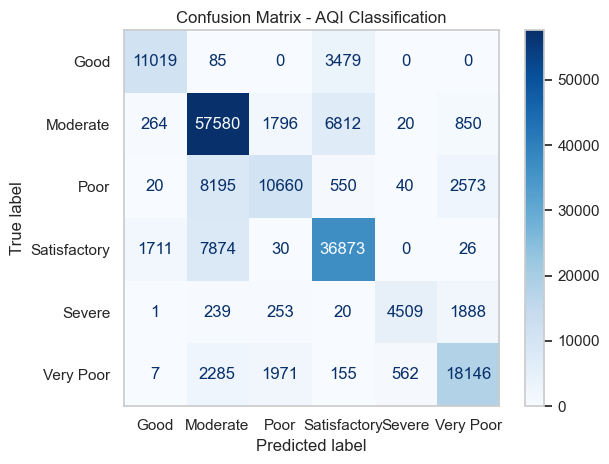

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming these are your actual and predicted labels
y_true = results_clf_df['Actual_AQI_Bucket']
y_pred = results_clf_df['Predicted_AQI_Bucket']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(y_true.unique()))
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - AQI Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

# XGBoost Classification Model

In [82]:
!pip install xgboost
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

In [83]:
# Drop non-numeric/unnecessary columns
#Creating aqi1 as new dataset to work on each model without altering cleaned dataset.
aqi1=aqi
X = aqi1.drop(columns=[ 'Datetime', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State'])
y = aqi1['AQI']

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Encode AQI_Bucket (classification target)
label_encoder = LabelEncoder()
y_clf = label_encoder.fit_transform(aqi1['AQI_Bucket'])

# Drop non-feature columns to create X for classification
X_clf = aqi1.drop(columns=[ 'Datetime', 'AQI', 'AQI_Bucket', 'StationName', 'City', 'State'])

In [85]:
# Scale features
scaler_clf = MinMaxScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf)

In [86]:
# Split data for classification model
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

In [87]:
# Hyperparameter grid (1 iteration for speed)
param_dist_clf = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, None],
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Base XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Randomized hyperparameter search (fast, only 1 iteration)
random_search_clf = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_clf,
    n_iter=20,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [88]:
# Fit model
random_search_clf.fit(X_train_clf, y_train_clf)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000229757ABB60>,
                                        'max_depth': [10, 20, None],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022975782420>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022975799430>},
                   random_state=42, scoring='accuracy', verbose=1)

In [89]:
# Predictions
y_pred_clf = random_search_clf.predict(X_test_clf)

In [90]:
# Evaluation
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_))

Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

        Good       0.87      0.78      0.82     14583
    Moderate       0.78      0.86      0.82     67322
        Poor       0.74      0.56      0.64     22038
Satisfactory       0.79      0.82      0.80     46514
      Severe       0.89      0.71      0.79      6910
   Very Poor       0.81      0.80      0.80     23126

    accuracy                           0.79    180493
   macro avg       0.81      0.76      0.78    180493
weighted avg       0.79      0.79      0.79    180493



In [91]:
# Decode label-encoded values to get original AQI_Bucket strings
actual_buckets = label_encoder.inverse_transform(y_test_clf)
predicted_buckets = label_encoder.inverse_transform(y_pred_clf)

# No .values needed, as they are already numpy arrays
results_clf_df = pd.DataFrame({
    'Actual_AQI_Bucket': actual_buckets,
    'Predicted_AQI_Bucket': predicted_buckets
})

# Show first few rows
print(results_clf_df.head())

  Actual_AQI_Bucket Predicted_AQI_Bucket
0         Very Poor            Very Poor
1      Satisfactory         Satisfactory
2          Moderate             Moderate
3          Moderate             Moderate
4          Moderate             Moderate


In [92]:
# Print best parameters
print("Best Parameters:", random_search_clf.best_params_)

# Accuracy already printed above
print(f"Final Accuracy: {accuracy:.2f}")

Best Parameters: {'colsample_bytree': 0.8281775897621597, 'learning_rate': 0.11416685200516473, 'max_depth': 20, 'n_estimators': 89, 'subsample': 0.9378135394712606}
Final Accuracy: 0.79


<Figure size 800x600 with 0 Axes>

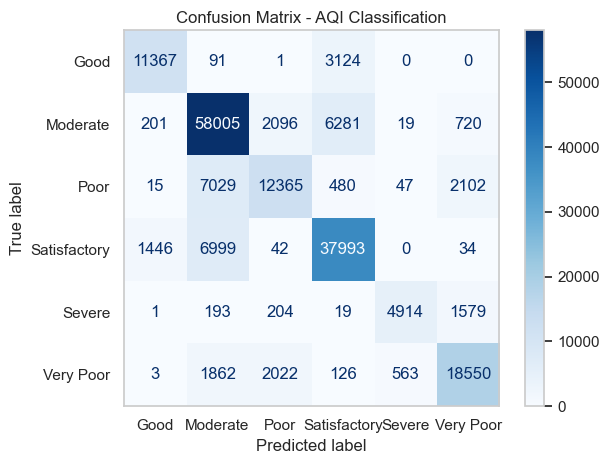

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Assuming these are your actual and predicted labels
y_true = results_clf_df['Actual_AQI_Bucket']
y_pred = results_clf_df['Predicted_AQI_Bucket']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(y_true.unique()))
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - AQI Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

# XGBoost Regression Model

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [95]:
aqi = pd.read_csv("aqi_cleaned")  # Ensure the correct file path
aqi['Datetime'] = pd.to_datetime(aqi['Datetime'])
aqi.sort_values(by='Datetime', inplace=True)
aqi.reset_index(drop=True, inplace=True)

In [96]:
# Drop unused categorical columns
aqi1 = aqi.drop(columns=['AQI_Bucket', 'StationName', 'City', 'State'])

In [97]:
# Separate features and target
X_raw = aqi1.drop(columns=['AQI', 'Datetime'])
y_raw = aqi1['AQI'].values


In [98]:
# Scale numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

In [99]:
# Define a function to create lag features
def create_lag_features(X, y, window_size=24):
    X_seq = np.zeros((len(X) - window_size, window_size * X.shape[1]), dtype=np.float32)
    y_seq = np.zeros(len(X) - window_size, dtype=np.float32)
    for i in range(len(X) - window_size):
        X_seq[i] = X[i:i+window_size].flatten()
        y_seq[i] = y[i + window_size]
    return X_seq, y_seq

In [100]:
# Create lag features
window_size = 24  # You can adjust this value as needed
X_seq, y_seq = create_lag_features(X_scaled, y_raw, window_size=window_size)

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [102]:
# Define the XGBoost regressor and hyperparameter search space
xgb = XGBRegressor(objective='reg:squarederror', tree_method='hist', random_state=42)

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


In [103]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=2,
    scoring='neg_mean_absolute_error',
    verbose=1,
    random_state=42,
    n_jobs=1  # Adjust based on your system's capabilities
)

In [104]:
# Train the model
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 200],
                                        'subsample': [0.7, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [105]:
# Evaluate the model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("\n✅ Best Parameters:", random_search.best_params_)
print("✅ Test MAE:", mae)


✅ Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
✅ Test MAE: 70.567314


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📈 Mean Absolute Error (MAE):", mae)
print("📉 Root Mean Squared Error (RMSE):", rmse)
print("🔁 R² Score:", r2)

📈 Mean Absolute Error (MAE): 70.567314
📉 Root Mean Squared Error (RMSE): 92.55881
🔁 R² Score: 0.3270310163497925


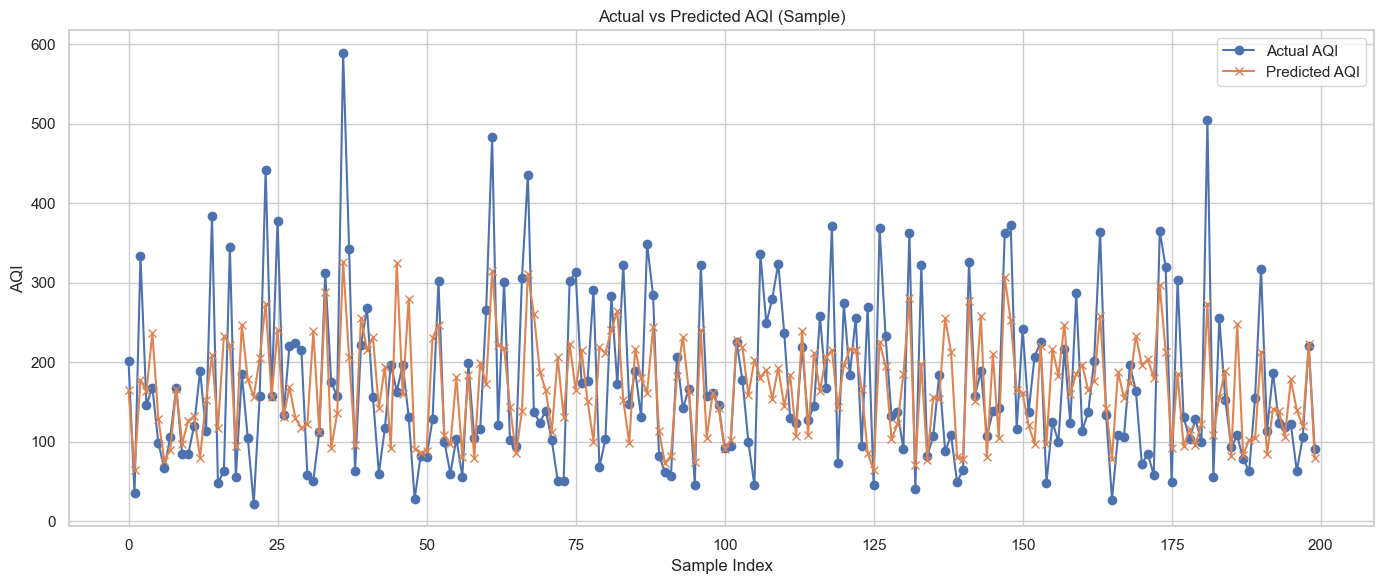

In [107]:
plt.figure(figsize=(14, 6))
plt.plot(y_test[:200], label='Actual AQI', marker='o')
plt.plot(y_pred[:200], label='Predicted AQI', marker='x')
plt.title("Actual vs Predicted AQI (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
comparison_df = pd.DataFrame({
    'Actual_AQI': y_test,
    'Predicted_AQI': y_pred
})

# Optionally round values for better readability
comparison_df = comparison_df.round(2)

# Show the first 20 rows
print(comparison_df.head(20))

    Actual_AQI  Predicted_AQI
0        201.0     164.580002
1         35.0      65.029999
2        333.0     177.770004
3        146.0     163.729996
4        168.0     236.570007
5         98.0     128.949997
6         67.0      76.279999
7        106.0      89.690002
8        168.0     166.559998
9         84.0      97.699997
10        84.0     126.339996
11       120.0     132.110001
12       189.0      79.989998
13       113.0     152.270004
14       384.0     208.559998
15        48.0     116.870003
16        63.0     233.490005
17       345.0     221.350006
18        56.0      95.089996
19       185.0     247.399994


# Kalman Filter Model

In [109]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import ParameterSampler
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

In [110]:
!pip install filterpy

In [111]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
aqi = pd.read_csv("aqi_cleaned")  # Ensure the correct file path
aqi['Datetime'] = pd.to_datetime(aqi['Datetime'])
aqi.sort_values(by='Datetime', inplace=True)
aqi.reset_index(drop=True, inplace=True)

In [114]:
# Drop unused categorical columns
aqi1 = aqi.drop(columns=['StationId', 'AQI_Bucket', 'StationName', 'City', 'State'])

In [115]:
# Separate features and target
X_raw = aqi1.drop(columns=['AQI', 'Datetime'])
y_raw = aqi1['AQI'].values


In [116]:
# Scale numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_raw)

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_raw, test_size=0.2, random_state=42)

In [118]:

# Ensure they are in proper NumPy format
X_train_np = X_train
X_test_np = X_test
y_train_np = y_train.reshape(-1, 1)
y_test_np = y_test.reshape(-1, 1)

n_features = X_test_np.shape[1]

In [119]:
# Define the parameter space
param_dist = {
    'q_var': np.logspace(-4, 0, 50),  # Process noise variance
    'r_var': np.logspace(-2, 2, 50)   # Measurement noise variance
}

# Random combinations to try
n_iter = 30
param_list = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))

best_rmse = float('inf')
best_params = None
best_predictions = None

n_features = X_test.shape[1]

# Run the search
for params in tqdm(param_list, desc="Tuning Kalman Filter"):
    q_var = params['q_var']
    r_var = params['r_var']

    # Initialize Kalman Filter
    kf = KalmanFilter(dim_x=n_features + 1, dim_z=n_features + 1)
    kf.x = np.zeros((n_features + 1, 1))
    kf.F = np.eye(n_features + 1)
    kf.H = np.eye(n_features + 1)
    kf.P *= 1000
    kf.R = np.eye(n_features + 1) * r_var
    kf.Q = np.eye(n_features + 1) * q_var

    predictions = []

    for i in range(len(X_test_np)):
        z = np.append(X_test_np[i], y_test_np[i]).reshape(-1, 1)
        kf.predict()
        kf.update(z)
        predicted_aqi = kf.x[-1, 0]
        predictions.append(predicted_aqi)

    rmse = np.sqrt(mean_squared_error(y_test_np, predictions))

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params
        best_predictions = predictions





Tuning Kalman Filter: 100%|██████████| 30/30 [11:26<00:00, 22.89s/it]


In [120]:
# Final evaluation
print("Best RMSE:", best_rmse)
print("Best parameters:", best_params)

Best RMSE: 3.8510120832264265
Best parameters: {'r_var': 0.021209508879201904, 'q_var': 0.8286427728546842}


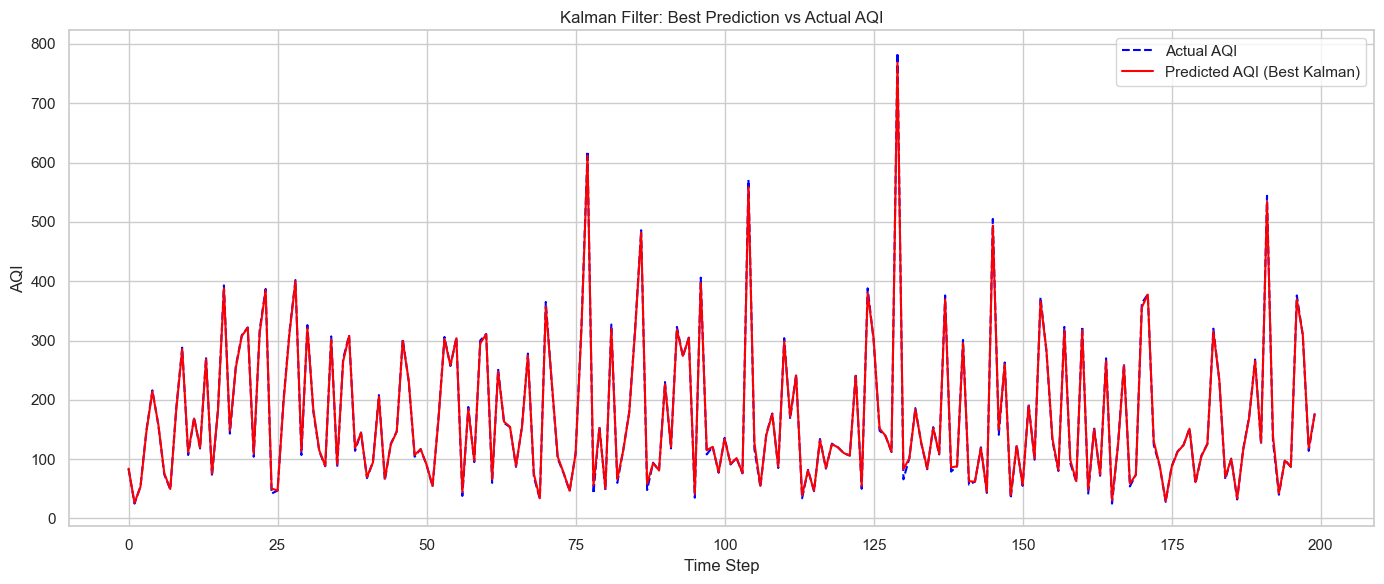

In [121]:
# Plotting the best prediction
plt.figure(figsize=(14, 6))
plt.plot(y_test_np[:200], label='Actual AQI', linestyle='--', color='blue')
plt.plot(best_predictions[:200], label='Predicted AQI (Best Kalman)', color='red')
plt.title('Kalman Filter: Best Prediction vs Actual AQI')
plt.xlabel('Time Step')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Overall, the CNN-LSTM and Kalman Filter models demonstrate more precise AQI forecasting capabilities, while Random Forest and XGBoost provide reliable baseline performance. 


# THE END